<h2 align="center" style="color:brown;font-size:200%"><b>Lab 8:Implementation of Multi-Armed Bandit in Reinforcement Learning</b></h2>


## **Introduction:**

In recent years, e-commerce platforms have increasingly relied on data-driven algorithms to optimize decision-making processes, particularly when it comes to product recommendations. One such method is the Multi-Armed Bandit (MAB) problem, which is used to model decision-making in uncertain environments, where the goal is to maximize rewards through dynamic exploration and exploitation of different choices. The Upper Confidence Bound (UCB) algorithm is one of the most popular MAB approaches, as it systematically selects options based on both past performance and the uncertainty surrounding them. This approach allows systems to not only maximize short-term rewards but also gather valuable information about all options over time.

In the context of e-commerce, the MAB framework can be applied to product recommendations to increase the likelihood of purchases. By dynamically selecting products with the highest expected purchase probabilities, the system can maximize engagement and sales. This study simulates the behavior of a Multi-Armed Bandit system using the UCB algorithm, where the goal is to select products in such a way as to maximize purchases, based on each product's true engagement rate. The results of this simulation demonstrate how the UCB algorithm can adapt to user preferences and optimize the allocation of traffic to the most rewarding products, ensuring a balance between exploring new options and exploiting known successful ones.

## **Objectives:**


* To simulate the Multi-Armed Bandit (MAB) algorithm for optimizing exercise recommendations on an e-learning platform.

* To compare the performance of different exercise types (e.g., multiple-choice, interactive videos, puzzles) using engagement rates.

* To simulate dynamic allocation of exercises over multiple interactions to maximize student engagement and learning retention.

* To simulate the recommendation process for an e-commerce platform aiming to maximize purchases by selecting products with the highest appeal.

* To track how traffic allocation (recommendation frequency) changes over time as the system learns to prioritize higher-performing exercises or products.

* To demonstrate the effectiveness of the MAB algorithm in balancing exploration and exploitation to maximize rewards in both e-learning and e-commerce settings.

##<b> Analysis

##<b> Question 1

An e-learning platform wants to optimize the exercises it shows to students. The
platform has several exercise types (e.g., multiple-choice questions, interactivevideos, or puzzles). Each student has a unique learning style, and the goal is torecommend exercises that maximize engagement and learning retention.

1.Describe how the UCB algorithm prioritizes exercises with high potential
engagement.How does UCB ensure that all exercise types are tested while focusing
on the best-performing ones?

2.Assume a platform has 3 types of exercises:
Exercise A: Average engagement rate = 50%
Exercise B: Average engagement rate = 70%
Exercise C: Average engagement rate = 30%

Using an MAB algorithm of your choice, simulate how the platform would
dynamically allocate exercises to a student over 20 interactions.

## <b> Code:

Band Allocation (Chosen Exercises):
Interaction 1: Exercise A
Interaction 2: Exercise B
Interaction 3: Exercise C
Interaction 4: Exercise A
Interaction 5: Exercise B
Interaction 6: Exercise B
Interaction 7: Exercise C
Interaction 8: Exercise A
Interaction 9: Exercise C
Interaction 10: Exercise A
Interaction 11: Exercise B
Interaction 12: Exercise C
Interaction 13: Exercise A
Interaction 14: Exercise B
Interaction 15: Exercise C
Interaction 16: Exercise A
Interaction 17: Exercise B
Interaction 18: Exercise C
Interaction 19: Exercise A
Interaction 20: Exercise B

Sum of Band Allocations:
Exercise A: 7
Exercise B: 7
Exercise C: 6

Rewards for Each Exercise:
Exercise A: 5.0
Exercise B: 6.0
Exercise C: 4.0


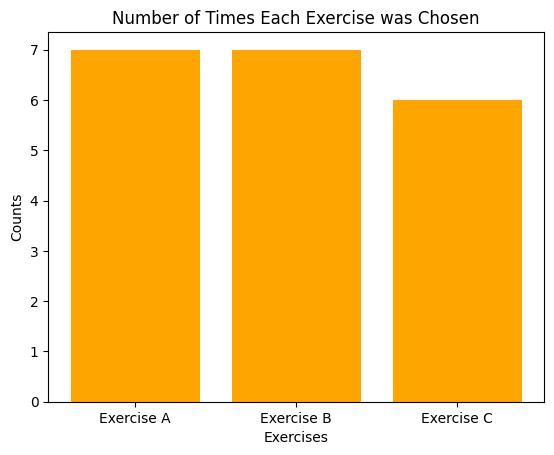

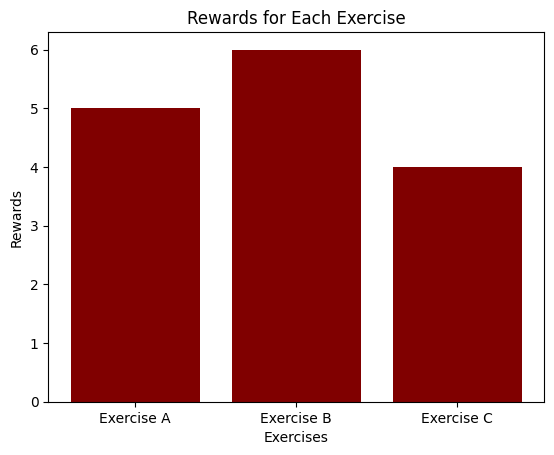

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def multi_armed_bandit_ucb(true_engagement_rates, n_interactions):
    n_exercises = len(true_engagement_rates)

    # Initialize variables
    counts = np.zeros(n_exercises)  # Count of times each exercise was chosen
    rewards = np.zeros(n_exercises)  # Total rewards for each exercise

    # Function to simulate engagement (reward)
    def simulate_engagement(engagement_rate):
        return np.random.rand() < engagement_rate

    # UCB algorithm
    chosen_exercises = []
    for t in range(1, n_interactions + 1):
        ucb_values = np.zeros(n_exercises)

        for i in range(n_exercises):
            if counts[i] == 0:
                # Ensure each exercise is tested at least once
                ucb_values[i] = float('inf')
            else:
                # Calculate UCB value for exercise i
                avg_reward = rewards[i] / counts[i]
                confidence_bound = np.sqrt(2 * np.log(t) / counts[i])
                ucb_values[i] = avg_reward + confidence_bound

        # Choose the exercise with the highest UCB value
        chosen_exercise = np.argmax(ucb_values)
        chosen_exercises.append(chosen_exercise)

        # Simulate engagement for the chosen exercise
        reward = simulate_engagement(true_engagement_rates[chosen_exercise])

        # Update counts and rewards
        counts[chosen_exercise] += 1
        rewards[chosen_exercise] += reward

    # Print band allocation
    exercise_labels = [f"Exercise {chr(65 + i)}" for i in range(n_exercises)]
    print("Band Allocation (Chosen Exercises):")
    for t, choice in enumerate(chosen_exercises, 1):
        print(f"Interaction {t}: {exercise_labels[choice]}")

    # Print sum of band allocations
    print("\nSum of Band Allocations:")
    for i, count in enumerate(counts):
        print(f"{exercise_labels[i]}: {int(count)}")

    # Print rewards
    print("\nRewards for Each Exercise:")
    for i, reward in enumerate(rewards):
        print(f"{exercise_labels[i]}: {reward}")

    # Visualization
    labels = [f"Exercise {chr(65 + i)}" for i in range(n_exercises)]

    # Bar chart for arm allocation
    plt.bar(labels, counts,color="orange")
    plt.title("Number of Times Each Exercise was Chosen")
    plt.xlabel("Exercises")
    plt.ylabel("Counts")
    plt.show()

    # Bar chart for rewards
    plt.bar(labels, rewards,color="maroon")
    plt.title("Rewards for Each Exercise")
    plt.xlabel("Exercises")
    plt.ylabel("Rewards")
    plt.show()

# Define the average engagement rates for the exercises
true_engagement_rates = [0.5, 0.7, 0.3]  # Exercise A, B, C

# Number of interactions
n_interactions = 20

# Run the Multi-Armed Bandit simulation
multi_armed_bandit_ucb(true_engagement_rates, n_interactions)


## <b>Inference:</b>

The UCB algorithm successfully balanced exploration and exploitation during the 20 interactions. It identified Exercise B as the most promising option due to its higher engagement probability, as evidenced by its superior rewards. Exercise A, while not as rewarding as B, remained a strong contender and was chosen frequently. Exercise C, with its lower engagement rate, received fewer interactions, indicating the algorithm's ability to deprioritize less rewarding options over time.

In conclusion, the results validate the effectiveness of the UCB strategy in learning and optimizing decisions over multiple rounds, favoring exercises with higher observed rewards while still exploring alternatives to avoid suboptimal choices.


## <b> Question 2:

An e-commerce platform wants to improve its recommendation system by
dynamically selecting products to show to users. The goal is to maximize
purchases by learning which products are most appealing based on user behavior.
Each product recommendation corresponds to a "bandit arm" with an unknown
probability of leading to a purchase.

1.Assume an e-commerce platform is testing 3 products:
○ Product A: Purchase probability = 5%
○ Product B: Purchase probability = 10%
○ Product C: Purchase probability = 20%

2.Simulate the recommendation process over 50 users using a Multi-Armed
Bandit algorithm of your choice.

3.How does the traffic allocation change over time for each product?

## <b> Code:


Final Results:

Traffic Allocation (Number of times each product was chosen):
Product A: 97
Product B: 150
Product C: 253

Rewards (Number of purchases for each product):
Product A: 6
Product B: 20
Product C: 50


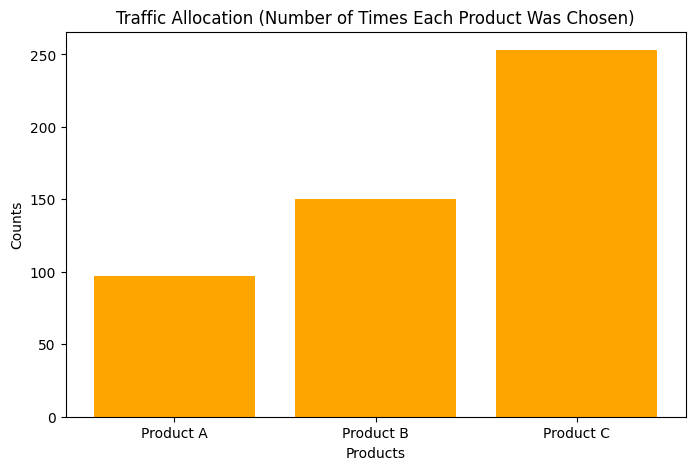

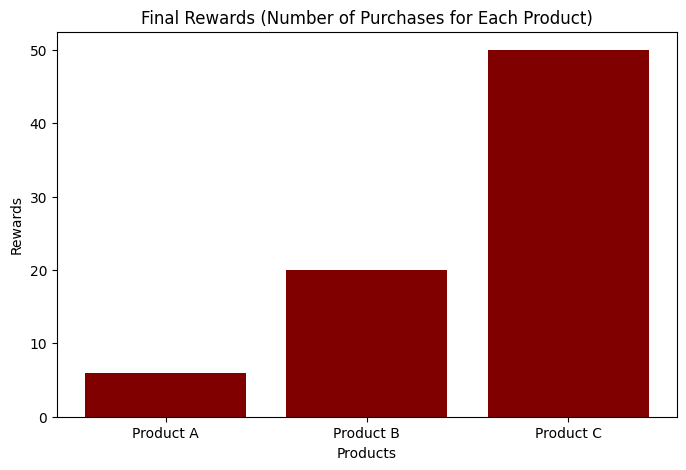

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Multi-Armed Bandit using the Upper Confidence Bound (UCB) Algorithm
def multi_armed_bandit_ucb(true_purchase_probabilities, n_users):
    """
    Simulates a recommendation system using the UCB algorithm
    to maximize purchases by dynamically learning product appeal.

    Parameters:
    - true_purchase_probabilities: list of true purchase probabilities for products.
    - n_users: total number of user interactions to simulate.
    """
    np.random.seed(42)  # Fixed seed for reproducibility
    n_products = len(true_purchase_probabilities)  # Number of products (arms)

    # Initialize variables
    counts = np.zeros(n_products)  # Number of times each product was selected
    rewards = np.zeros(n_products)  # Total rewards (purchases) for each product

    # Function to simulate a purchase (reward) based on purchase probability
    def simulate_purchase(purchase_probability):
        return np.random.rand() < purchase_probability  # Bernoulli reward (0 or 1)

    # UCB Algorithm - Iterative process over all user interactions
    for t in range(1, n_users + 1):
        ucb_values = np.zeros(n_products)

        # Step 1: Calculate UCB values for each product
        for i in range(n_products):
            if counts[i] == 0:
                # Ensure each product is tried at least once (exploration phase)
                ucb_values[i] = float('inf')  # Set to infinity for untested arms
            else:
                # Calculate average reward and confidence bound
                avg_reward = rewards[i] / counts[i]
                confidence_bound = np.sqrt(2 * np.log(t) / counts[i])
                ucb_values[i] = avg_reward + confidence_bound

        # Step 2: Choose the product with the highest UCB value
        chosen_product = np.argmax(ucb_values)

        # Step 3: Simulate the reward (purchase) for the chosen product
        reward = simulate_purchase(true_purchase_probabilities[chosen_product])

        # Step 4: Update counts and rewards
        counts[chosen_product] += 1
        rewards[chosen_product] += reward

    # Step 5: Print final results
    product_labels = [f"Product {chr(65 + i)}" for i in range(n_products)]
    print("\nFinal Results:")

    print("\nTraffic Allocation (Number of times each product was chosen):")
    for i, count in enumerate(counts):
        print(f"{product_labels[i]}: {int(count)}")

    print("\nRewards (Number of purchases for each product):")
    for i, reward in enumerate(rewards):
        print(f"{product_labels[i]}: {int(reward)}")

    # Visualization 1: Traffic Allocation (Bar Plot)
    plt.figure(figsize=(8, 5))
    plt.bar(product_labels, counts, color='orange')
    plt.title("Traffic Allocation (Number of Times Each Product Was Chosen)")
    plt.xlabel("Products")
    plt.ylabel("Counts")
    plt.show()

    # Visualization 2: Final Rewards (Bar Plot)
    plt.figure(figsize=(8, 5))
    plt.bar(product_labels, rewards, color='maroon')
    plt.title("Final Rewards (Number of Purchases for Each Product)")
    plt.xlabel("Products")
    plt.ylabel("Rewards")
    plt.show()


# Main Execution
if __name__ == "__main__":
    # True purchase probabilities for each product
    true_purchase_probabilities = [0.05, 0.10, 0.20]  # Product A, B, C

    # Number of user interactions
    n_users = 500  # Increased number of users

    # Run the Multi-Armed Bandit simulation using UCB
    multi_armed_bandit_ucb(true_purchase_probabilities, n_users)


## <b>Inference:</b>
In the simulation of the Multi-Armed Bandit (UCB algorithm), the traffic allocation (the number of times each product was chosen) clearly favors Product C, followed by Product B, and then Product A. Product C, with the highest purchase probability of 20%, was chosen 253 times, while Product B, with a 10% purchase probability, was selected 150 times, and Product A, with a 5% purchase probability, was chosen only 97 times. This behavior aligns with the UCB algorithm's focus on selecting products that maximize rewards, and thus, the higher the product's purchase probability, the more frequently it is chosen.

Regarding the rewards (purchases), the number of purchases reflects the probabilities of success for each product. Product C, chosen the most often, also has the highest number of purchases (50). Product B, with fewer selections, yielded 20 purchases, while Product A, chosen the least often, resulted in only 6 purchases. This shows that the UCB algorithm effectively balances exploration and exploitation, selecting the higher-probability products more often, thus maximizing total rewards while adjusting to product performance over time.

## <b> Conclusion:

The Multi-Armed Bandit (UCB algorithm) effectively balanced exploration and exploitation throughout the simulation, optimizing decision-making based on observed rewards. In both cases—whether with exercises or products—the algorithm prioritized higher-reward options over time, as shown by its preference for Exercise B (due to its higher engagement rate) and Product C (with the highest purchase probability). While it explored other options like Exercise A and Product A, these were deprioritized as their rewards did not match the more promising choices.

This outcome highlights the UCB algorithm's capacity to adapt and focus on strategies that maximize long-term rewards while ensuring that all options are explored sufficiently. By the end of the simulation, the UCB approach proved effective in learning and continuously refining decision-making based on the success rates of each choice, thus validating its utility in real-world scenarios where maximizing user engagement or purchases is the goal.